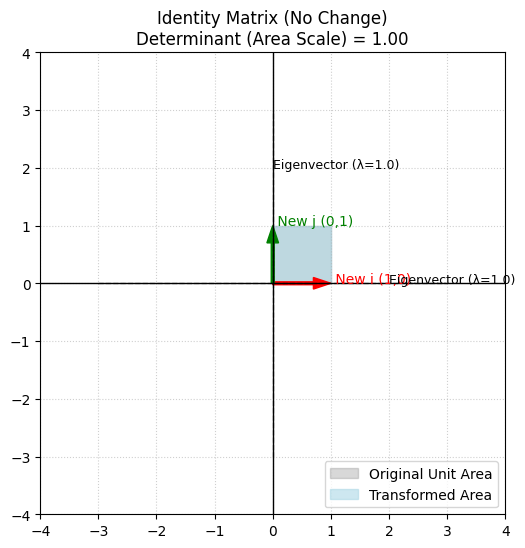

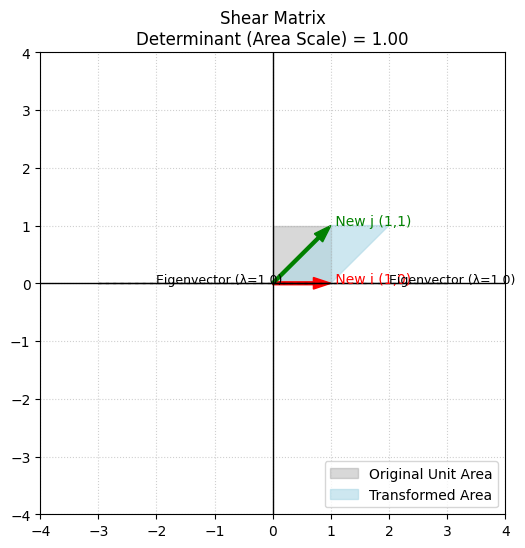

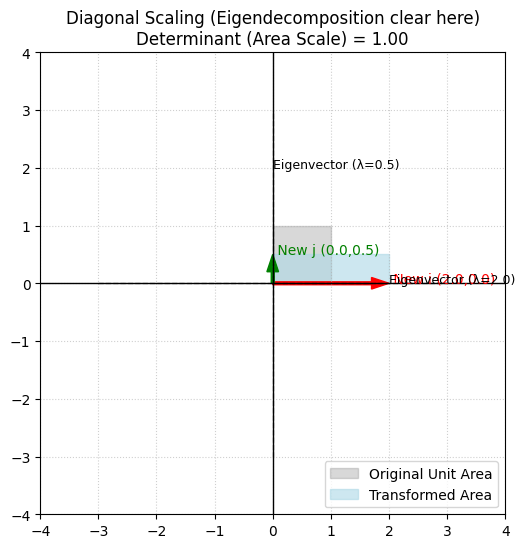

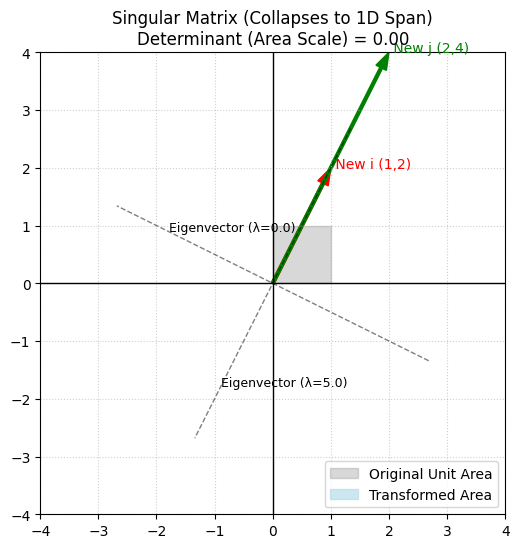

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_vector(vec, origin=[0, 0], **options):
    """Helper to plot a single vector."""
    return plt.arrow(origin[0], origin[1], vec[0], vec[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

def visualize_transformation(matrix, title="Linear Transformation"):
    """
    Visualizes how a matrix transforms a unit square and basis vectors.
    """
    # 1. Setup the Unit Square (4 corners)
    # The columns of 'unit_square' represent (x, y) coordinates
    unit_square = np.array([
        [0, 1, 1, 0],  # x coords
        [0, 0, 1, 1]   # y coords
    ])
    
    # 2. Apply Matrix Multiplication (The Transformation)
    # New coords = Matrix @ Old coords
    transformed_square = matrix @ unit_square
    
    # 3. Setup Basis Vectors i (1,0) and j (0,1)
    i_hat = np.array([1, 0])
    j_hat = np.array([0, 1])
    
    # Transform basis vectors
    i_hat_new = matrix @ i_hat
    j_hat_new = matrix @ j_hat
    
    # --- PLOTTING ---
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot original unit square (dotted gray)
    ax.add_patch(Polygon(unit_square.T, color='gray', alpha=0.3, label='Original Unit Area'))
    
    # Plot transformed shape (blue)
    ax.add_patch(Polygon(transformed_square.T, color='lightblue', alpha=0.6, label='Transformed Area'))
    
    # Plot Transformed Basis Vectors
    plot_vector(i_hat_new, color='red', width=0.05)
    plot_vector(j_hat_new, color='green', width=0.05)
    
    # Annotations
    det = np.linalg.det(matrix)
    ax.text(i_hat_new[0], i_hat_new[1], f" New i ({i_hat_new[0]},{i_hat_new[1]})", color='red', fontsize=10)
    ax.text(j_hat_new[0], j_hat_new[1], f" New j ({j_hat_new[0]},{j_hat_new[1]})", color='green', fontsize=10)
    
    # Compute Eigenvalues/Vectors for visualization
    evals, evecs = np.linalg.eig(matrix)
    
    # Only plot real eigenvectors for 2D visualization
    if np.isreal(evals).all():
        for i in range(len(evals)):
            # Scale eigenvector by its eigenvalue to show the stretch
            vec = evecs[:, i]
            val = evals[i]
            # Plot the eigenvector direction (dashed line)
            # We plot a long line to show the "span" of the eigenvector
            x_vals = np.array([-3, 3]) * vec[0]
            y_vals = np.array([-3, 3]) * vec[1]
            ax.plot(x_vals, y_vals, 'k--', alpha=0.5, linewidth=1)
            ax.text(vec[0]*2, vec[1]*2, f"Eigenvector (λ={val:.1f})", color='black', fontsize=9)

    # Formatting
    ax.set_title(f"{title}\nDeterminant (Area Scale) = {det:.2f}")
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.legend(loc='lower right')

# --- MAIN EXECUTION ---

# Example 1: Identity Matrix
# Does nothing. Area scale = 1.
I = np.array([[1, 0], 
              [0, 1]])
visualize_transformation(I, "Identity Matrix (No Change)")

# Example 2: Shear Matrix (Linear Dependence/Span intuition)
# Notice i_hat stays at (1,0), but j_hat moves. Area is preserved (det=1).
Shear = np.array([[1, 1], 
                  [0, 1]])
visualize_transformation(Shear, "Shear Matrix")

# Example 3: Scaling & Rotation (Determinant & Eigenvectors)
# This matrix stretches by 2 in x, 0.5 in y. 
# Determinant = 2 * 0.5 = 1.0 (Area preserved).
Scale = np.array([[2, 0], 
                  [0, 0.5]])
visualize_transformation(Scale, "Diagonal Scaling (Eigendecomposition clear here)")

# Example 4: Singular Matrix (Linear Dependence)
# Columns are linearly dependent: [1, 2] is a multiple of [2, 4].
# Determinant = 0. The 2D square collapses into a 1D line.
Singular = np.array([[1, 2], 
                     [2, 4]])
visualize_transformation(Singular, "Singular Matrix (Collapses to 1D Span)")

plt.show()